## Given maximal number of comparisons an ordinary person can perform without going insane and assuming that these comparisons must be enough for creating a ranking, what is the maximal size of image gallery?

### Graph Connectivity Threshold

Erdos-Renyi Random Graph $G(n,p)$, where: <br/>
$n$ - number of nodes and <br/>
$p$ - probability of selecting an edge,  <br/>
will almost surely be connected if <br/>
\begin{align}p > \frac{\left(1-\epsilon\right) \ln n}{n} \end{align}
for some positive $\epsilon$.

#### How many edges in a connected graph?


${{n}\choose{2}}$ edges in a complete graph. 
\begin{align}
k_0 = p \cdot {{n}\choose{2}} = \left(1+\epsilon\right)\frac{\ln n}{n} \cdot \frac{n\left(n-1\right)}{2} = \left(1+\epsilon\right)\frac{n-1}{2}\ln n
\end{align}

### Rank Centrality

$ p = {}^d/_n$

"[...] as long as we choose $d = \Theta\left(\ln^2 n\right)$ [...] the error goes to $0$ as $n$ increases." [1]

\begin{align}
k_1 = p \cdot {{n}\choose{2}} = \frac{\ln^2 n}{n} \cdot \frac{n\left(n-1\right)}{2} = \frac{n-1}{2}\ln^2 n
\end{align}

$k_1 > k_0 \Leftrightarrow \ln n > 1 + \epsilon \Leftrightarrow n > \exp(1+\epsilon)$ (for some positive $\epsilon$).

### Let's set a sanity threshold of comparisons and retrieve a number of images in the gallery

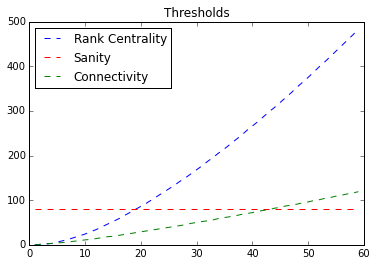

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

comparison_threshold = 80

x = np.arange(1,60)
rank_centrality = np.ceil(0.5*(x-1)*np.log(x)**2)
connectivity_threshold = np.ceil(0.5*(x-1)*np.log(x))
z = np.ones((len(x)))
z[:]=comparison_threshold
ranking, = plt.plot(x,rank_centrality,'b--',label='Rank Centrality')
sanity, = plt.plot(x,z,'r--', label='Sanity')
connectivity, = plt.plot(x, connectivity_threshold, 'g--', label='Connectivity')
plt.legend(handles=[ranking, sanity, connectivity], loc=2)
plt.title('Thresholds')

Graph having <code>comparison_threshold</code> edges is connected almost for sure if its number of nodes is at most...

In [22]:
max(x0 for x0, y0 in zip(x, connectivity_threshold) if y0 <= comparison_threshold)

43

Size of image gallery that could be ranked with Rank Centrality given <code>comparison_threshold</code> comparisons is...

In [29]:
max(x0 for x0, y0 in zip(x,rank_centrality) if y0 <= comparison_threshold)

19

Biblliography:

[1] Negahban, S., Oh, S., & Shah, D. (2012). Iterative ranking from pair-wise comparisons. In Advances in Neural Information Processing Systems (pp. 2474-2482).